In [1]:
import tifffile as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sncaip_folder = '/home/hcleroy/PostDoc/Colab_David/ExperimentalData/Processed_Cell_Crops/Synphillin_Channel/'
sncaip_names = [sncaip_folder+'Cell'+str(i)+'_ROI'+str(i)+'_SNCAIP.tif' for i in range(1,11)]
sncaip =  [tf.imread(name) for name in sncaip_names]
for i,stack in enumerate(sncaip):
       np.save(sncaip_folder+'masks4D_'+str(i)+'.npy',sncaip[i],allow_pickle=True)

In [3]:
mask_folder = '/home/hcleroy/PostDoc/Colab_David/ExperimentalData/Processed_Cell_Crops/mask/'
cell_names = [mask_folder+'cell'+str(i)+'.tiff' for i in range(10)]
cond_names = [mask_folder+'cond'+str(i)+'.tiff' for i in range(10)]
cyt_names = [mask_folder+'cyt'+str(i)+'.tiff' for i in range(10)]

In [4]:
cell_img = [tf.imread(name) for name in cell_names]
cond_img = [tf.imread(name) for name in cond_names]
cyt_img = [tf.imread(name) for name in cyt_names]

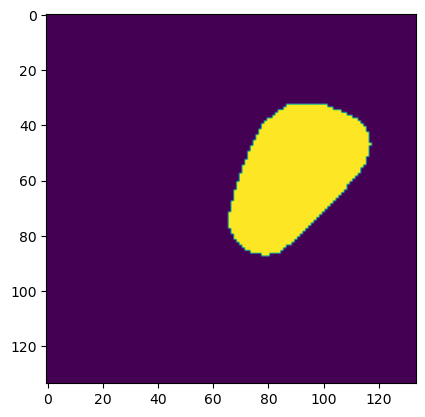

In [5]:
plt.imshow(cell_img[0][0] - cyt_img[0][0] - cond_img[0][0])

In [6]:
full_labeled_data = [np.zeros((stack.shape[0],stack.shape[1],stack.shape[2],3),dtype=np.float32) for stack in cell_img]
for i in range(len(cell_img)):
    for j in range(cell_img[i].shape[0]):
        full_labeled_data[i][j,:,:,0] = (cell_img[i][j] - cyt_img[i][j] - cond_img[i][j])
        full_labeled_data[i][j,:,:,1] = cond_img[i][j]
        full_labeled_data[i][j,:,:,2] =  cyt_img[i][j]

In [7]:
#for i,stack in enumerate(full_labeled_data):
#    tf.imwrite('three_labeled'+str(i)+'.tif',full_labeled_data[i])
COLOR_DICT = {
    (0, 0, 0): 0,      # Background
    (255, 0, 0): 1,    # Cell contour
    (0, 255, 0): 2,    # Nucleus
    (0, 0, 255): 3     # Condensate
}
def rgb_to_onehot(mask):
    onehot_mask = np.zeros((mask.shape[0], mask.shape[1], 4), dtype=np.float32)
    for color, index in COLOR_DICT.items():
        onehot_mask[np.all(mask == color, axis=-1)] = np.eye(4)[index]
    return onehot_mask

In [8]:
categorical_imgs  = [np.zeros((stack.shape[0],stack.shape[1],stack.shape[2],4),dtype=np.float32) for stack in cell_img]
for i in range(len(full_labeled_data)):
    for j in range(full_labeled_data[i].shape[0]):
        categorical_imgs[i][j] = rgb_to_onehot(full_labeled_data[i][j])

In [29]:
#for i,stack in enumerate(categorical_imgs):
#       np.save('masks4D_'+str(i)+'.npy',categorical_imgs[i],allow_pickle=True)

In [9]:
categorical_imgs[0].shape

(30, 134, 134, 4)

In [10]:
def conver_class_to_label(image):
        # Use np.argmax to get the index of the max value in the one-hot encoded vector for each pixel
    class_labels = np.argmax(image, axis=-1)
    
    # Add a new axis to match the desired output shape (resolution, resolution, 1)
    class_labels = class_labels[..., np.newaxis]
    
    return class_labels

In [19]:
imgs_labels  = [np.zeros((stack.shape[0],stack.shape[1],stack.shape[2],1),dtype=np.float32) for stack in cell_img]
for i in range(len(full_labeled_data)):
    for j in range(full_labeled_data[i].shape[0]):
        imgs_labels[i][j] = conver_class_to_label(categorical_imgs[i][j])

In [22]:
for i,stack in enumerate(imgs_labels):
       np.save('masks1D_'+str(i)+'.npy',stack,allow_pickle=True)